In [2]:
import cmeutils
import cmeutils.polymers as polymer
from cmeutils.gsd_utils import snap_molecule_cluster
import warnings
warnings.filterwarnings("ignore")
import time
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import mbuild as mb

## Example

This example is for a .gsd file that contains 10 molecuels, each one with 5 monomers
The molecules are united-atom PEEK, so each monomer contains 22 atoms

In [4]:
gsdfile = "100-20mers.gsd"
peek_system = polymer.System(gsd_file=gsdfile, gsd_frame=0, atoms_per_monomer=22)

/home/chris/miniconda3/envs/cmeutils/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Hierarchial structures




In [7]:
print(f"{peek_system.n_molecules} Molecules")
print(f"{peek_system.n_monomers} Monomers")
print(f"{peek_system.n_atoms} Atoms")
print()
print(len((peek_system.molecules)))
print(peek_system.molecules[0:5])

100 Molecules
2000 Monomers
44000 Atoms

100
[<cmeutils.polymers.Molecule object at 0x7f7e8b2add90>, <cmeutils.polymers.Molecule object at 0x7f7e8b2b5290>, <cmeutils.polymers.Molecule object at 0x7f7e8aed5890>, <cmeutils.polymers.Molecule object at 0x7f7e8aedce50>, <cmeutils.polymers.Molecule object at 0x7f7e8aee2350>]


/home/chris/miniconda3/envs/cmeutils/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Looking at just 1 of the molecule objects from peek_system.molecules

In [9]:
molecule_1 = peek_system.molecules[0]
print(f"{molecule_1.n_monomers} Monomers")
print(f"{molecule_1.n_atoms} Atoms")
print()
print(len(molecule_1.monomers))
print(molecule_1.monomers[0:5])

20 Monomers
440 Atoms

20
[<cmeutils.polymers.Monomer object at 0x7f7e8aedce90>, <cmeutils.polymers.Monomer object at 0x7f7e8aedc3d0>, <cmeutils.polymers.Monomer object at 0x7f7e8aedce10>, <cmeutils.polymers.Monomer object at 0x7f7e8aedced0>, <cmeutils.polymers.Monomer object at 0x7f7e8aedcf10>]


/home/chris/miniconda3/envs/cmeutils/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Looking at just 1 of the monomer objects from molecule_1

In [10]:
monomer_1 = molecule_1.monomers[0]
print(f"{monomer_1.n_atoms} Atoms")

22 Atoms


/home/chris/miniconda3/envs/cmeutils/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Properties at each structure level

In [11]:
print(molecule_1.center)
print(monomer_1.center)
print(molecule_1.end_to_end_distance())

[  8.22849751  -6.37031364 -12.47945309]
[  9.28754139  -3.69121075 -10.02487183]
37.08326032846742


/home/chris/miniconda3/envs/cmeutils/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Generating Components

There is a `Component` class that will allow you to group atoms together in structures that are smaller than the groupings in the `Monomer` class.

Right now, what is required is a dictionary of `name: indices`.

These indices are how the substructure exists within a single monomer, no the entire system.  For example, with PEEK which consists of 3 ring-like structures:

In [12]:
comp_mapping = {
    "ring_1": [0, 1, 2, 3, 4, 20, 21],
    "ring_2": [5, 6, 7, 8, 9, 18, 19],
    "ring_3": [10, 11, 12, 13, 14, 15, 16, 17]
}

for monomer in peek_system.monomers():
    monomer.generate_components(index_mapping = comp_mapping)

/home/chris/miniconda3/envs/cmeutils/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Bond length and angle distributions

We can obtain information about the structure of the system at level more coarse than atomistic. For example, we might want to see the distribution of "bond" lengths and angles between monomers or segments.

The `System` class contains a function for each type of distribution.  The data is returned, and with the `plot` parameter you can see a plot of the distribution.

/home/chris/miniconda3/envs/cmeutils/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


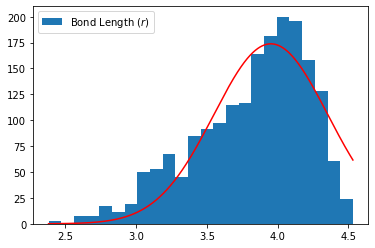

In [13]:
bond_dist = peek_system.bond_length_distribution(nbins=20, plot=True)

/home/chris/miniconda3/envs/cmeutils/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


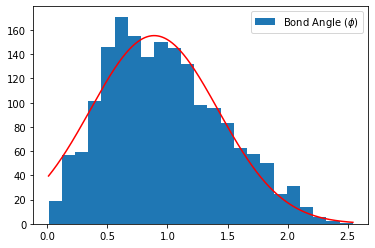

In [14]:
ang_dist = peek_system.bond_angle_distribution(nbins=20, plot=True)

## Coarse-graining

We can use the center of mass methods and Molecule and Monomer classes to generate a coarse-grained representation of the UA system:

**NOTE:**
This requires that mbuild and py3Dmol are installed

`conda install -c conda-forge mbuild py3Dmol`

In [ ]:
import mbuild as mb

## Example: Using the Component() class to create a coarse-grained system

In [ ]:
cg_components = mb.Compound()
molecules = []
for mol in peek_system.molecules:
    mol_comp = mb.Compound()
    last_bead = None
    for mon_idx, mon in enumerate(mol.monomers):
        for comp_idx, comp in enumerate(mon.components.items()):
            name = comp[0]
            pos = comp[1].center
            bead = mb.Compound(name=name, pos=pos)
            mol_comp.add(bead)
            if mon_idx == 0 and comp_idx == 0:
                pass
            else:
                mol_comp.add_bond((bead, last_bead))
            last_bead = bead
    cg_components.add(mol_comp)
                             
cg_components.visualize() 

## Example: Using the Monomer() class to create a coarse-grained system

Using mBuild, and the tools described above, we can generate a coarse-grained representation of the system where 1 bead is equivalent to 1 monomer from the united-atom system.

In [ ]:
cg_monomers = mb.Compound()
for mol_idx, molecule in enumerate(peek_system.molecules):
    molecule_comp = mb.Compound(name=f"mol{mol_idx}")
    last_bead = None
    for mon_idx, monomer in enumerate(molecule.monomers):
        bead_name = f"mol{mol_idx}_mon{mon_idx}"
        #pos = monomer.unwrapped_center * 3.3996695084235347
        pos = monomer.center
        bead = mb.Compound(name=bead_name, pos=pos)
        molecule_comp.add(bead)
        if 0 < mon_idx < len(molecule.monomers):
            molecule_comp.add_bond((bead, last_bead))
        last_bead = bead
    cg_monomers.add(molecule_comp)
    
cg_monomers.visualize()

## Example: Using the Segment() class to create a coarse-grained system:

When creating a system object, the Molecule objects are automatically generated, and each time a `Molecule` class is instantiated, the `Monomer` objects are automatically created.

In order to create `Segment` instances, we will have to call the `generate_segments` method for each `Molecule` object.  The important parameter of input is defining how many monomers 1 segment consists of.

In [ ]:
for mol in peek_system.molecules:
    mol.generate_segments(5) # We're saying 5 monomers per segment

In [ ]:
cg_segments = mb.Compound()
for mol_idx, molecule in enumerate(peek_system.molecules):
    molecule_comp = mb.Compound(name=f"mol{mol_idx}")
    last_bead = None
    for seg_idx, segment in enumerate(molecule.segments):
        bead_name = f"mol{mol_idx}_mon{seg_idx}"
        #pos = monomer.unwrapped_center * 3.3996695084235347
        pos = segment.center / 10
        bead = mb.Compound(name=bead_name, pos=pos)
        molecule_comp.add(bead)
        if 0 < seg_idx < len(molecule.monomers):
            molecule_comp.add_bond((bead, last_bead))
        last_bead = bead
    cg_segments.add(molecule_comp)
    
cg_segments.visualize()